In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [4]:
def add_bias_column(X):
    X_shape = X.shape
    X_new = np.ones((X.shape[0], X.shape[1]+1))
    X_new[:,1:] = X
    return X_new

In [5]:
def cost_function(y, y_hat):
    return np.sum(((y - y_hat)**2))/(2*len(y))

In [6]:
def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    X = add_bias_column(X)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features).reshape(-1,1)

    return X, y.reshape(-1,1), w

In [16]:
def sgd(w, X, y, eta = 0.001):
    
    Xtrain, ytrain = X[:400], y[:400]
    Xtest, ytest = X[400:], y[400:]
    
    loss_arr = []
    train_losses = []
    test_losses = []
    for i in range(1000):
        y_hat = Xtrain.dot(w)
        cost = cost_function(ytrain, y_hat)
        loss_arr.append(cost)
        train_losses.append(cost)
        gradient = -((ytrain-y_hat).T.dot(Xtrain).reshape(-1,1))/ytrain.shape[0]
        w = w - eta*gradient
        y_pred = Xtest.dot(w)
        cost_t = cost_function(ytest, y_pred)
        test_losses.append(cost_t)
        if (i%25 == 0):
            print("Cost:", np.mean(np.array(train_losses)))
            train_losses = []
            print("Test cost:", np.mean(np.array(test_losses)))
            test_losses = []
    
    y_hat = Xtrain.dot(w)
    print("Final cost:", cost_function(ytrain, y_hat))
    print(w)
    return w, loss_arr

In [17]:
X, y, w = load_data_and_init_params()
print(X.shape, y.shape, w.shape)

------ Loading Boston Houses Dataset ------
(506, 14) (506, 1) (14, 1)


In [18]:
w_new, loss_arr = sgd(w, X, y, 0.000001)

Cost: 94981.263577
Test cost: 308251.859795
Cost: 16625.8876818
Test cost: 101234.889705
Cost: 8616.63763699
Test cost: 48960.8892906
Cost: 5845.59424852
Test cost: 27958.1255248
Cost: 4173.33423709
Test cost: 15869.9578662
Cost: 3152.83999062
Test cost: 8970.64213579
Cost: 2519.49952816
Test cost: 5077.7338224
Cost: 2116.64960644
Test cost: 2915.3939315
Cost: 1851.51303587
Test cost: 1740.47969528
Cost: 1669.12276894
Test cost: 1122.20063054
Cost: 1536.89034587
Test cost: 812.425349905
Cost: 1435.47354639
Test cost: 669.462839028
Cost: 1353.37184081
Test cost: 613.359615688
Cost: 1283.72791322
Test cost: 599.74959207
Cost: 1222.43471729
Test cost: 604.609097043
Cost: 1167.01513605
Test cost: 615.409402046
Cost: 1115.958865
Test cost: 626.012828911
Cost: 1068.32987972
Test cost: 633.752202852
Cost: 1023.53403728
Test cost: 637.778125222
Cost: 981.181447838
Test cost: 638.138170306
Cost: 941.004934738
Test cost: 635.275332622
Cost: 902.811691588
Test cost: 629.764064379
Cost: 866.454589

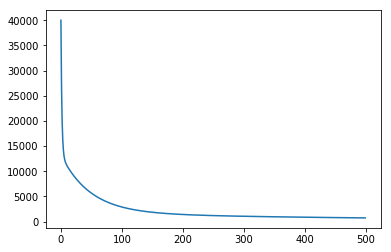

In [12]:
plt.plot(loss_arr[:500])

In [19]:
def sgd_first_order(w, X, y, a=0.001, eta = 0.001):

    Xtrain, ytrain = X[:400], y[:400]
    Xtest, ytest = X[400:], y[400:]
    
    eta_values = []
    loss_arr = []
    
    y_hat = Xtrain.dot(w)
    old_gradient = -((ytrain - y_hat).T.dot(Xtrain).reshape(-1,1))/ytrain.shape[0]
    w = w - eta*old_gradient
    
    eta_values.append(eta)
    train_losses = []
    test_losses = []
    lrs = []
    for i in range(1000):
        y_hat = Xtrain.dot(w)
        cost = cost_function(ytrain, y_hat)
        loss_arr.append(cost)
        train_losses.append(cost)
        lrs.append(np.squeeze(eta))
        new_gradient = -((ytrain - y_hat).T.dot(Xtrain).reshape(-1,1))/ytrain.shape[0]    
        scaled_old_gradient = (old_gradient - np.mean(old_gradient))/np.std(old_gradient)
        scaled_new_gradient = (new_gradient - np.mean(new_gradient))/np.std(new_gradient)        
        dlr = -np.dot(scaled_old_gradient.T, scaled_new_gradient)
        w = w - eta* new_gradient
        eta = eta - a*dlr
        eta_values.append(eta[0,0])
        old_gradient = new_gradient
        y_pred = Xtest.dot(w)
        cost_t = cost_function(ytest, y_pred)
        test_losses.append(cost_t)
        if (i%25 == 0):
            print("Cost:", np.mean(np.array(train_losses)))
            train_losses = []
            print("Test cost:", np.mean(np.array(test_losses)))
            test_losses = []
            print("Learning rate:", np.mean(np.array(lrs)))
            lrs = []
            
    y_hat = Xtrain.dot(w)
    print("Final cost:", cost_function(ytrain, y_hat))
    print(w)
    return w,eta_values,loss_arr

In [20]:
X, y, w = load_data_and_init_params()
w_new, eta_values, loss_arr = sgd_first_order(w, X, y, 0.000000001, 0.0000001)

------ Loading Boston Houses Dataset ------
Cost: 133332.322253
Test cost: 637763.890029
Learning rate: 1e-07
Cost: 58657.8163527
Test cost: 375845.076999
Learning rate: 2.81985951991e-07
Cost: 16097.3289038
Test cost: 152966.129873
Learning rate: 6.3161488212e-07
Cost: 10647.932347
Test cost: 97382.7244416
Learning rate: 9.81501949236e-07
Cost: 6091.93575556
Test cost: 55278.2267069
Learning rate: 1.33150183085e-06
Cost: 3050.5110823
Test cost: 26910.5225419
Learning rate: 1.68150153293e-06
Cost: 1438.16827852
Test cost: 11515.161528
Learning rate: 2.03150051693e-06
Cost: 738.631391288
Test cost: 4558.63510395
Learning rate: 2.38149686339e-06
Cost: 477.662205058
Test cost: 1837.64403025
Learning rate: 2.73148432914e-06
Cost: 381.867701064
Test cost: 863.582809878
Learning rate: 3.08145404772e-06
Cost: 336.229855533
Test cost: 519.755442886
Learning rate: 3.43141954783e-06
Cost: 303.715506
Test cost: 390.199655945
Learning rate: 3.78140313705e-06
Cost: 275.149713735
Test cost: 333.9842

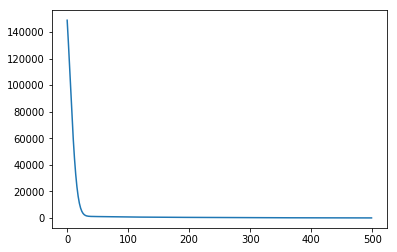

In [122]:
plt.plot(loss_arr[:500])

In [25]:
epsilon = 0.00001


def sgd_finite_differences(w, X, y, eta = 0.001):
    
    Xtrain, ytrain = X[:400], y[:400]
    Xtest, ytest = X[400:], y[400:]
    
    eta_values = []
    eta_values.append(eta)
    loss_arr = []
    train_losses = []
    test_losses = []
    lrs = []
    for i in range(1000):
        y_hat = Xtrain.dot(w)
        cost = cost_function(ytrain, y_hat)
        loss_arr.append(cost)
        train_losses.append(cost)
        gradient = -((ytrain - y_hat).T.dot(Xtrain).reshape(-1,1))/ytrain.shape[0]
        old_w = w
        w = w - eta*gradient
        eta = eta - 2*epsilon*(cost_function(ytrain,Xtrain.dot(old_w-(eta+epsilon)*gradient)) - cost_function(ytrain,Xtrain.dot(old_w-(eta-epsilon)*gradient)))/(cost_function(ytrain,Xtrain.dot(old_w-(eta+2*epsilon)*gradient))+cost_function(ytrain,Xtrain.dot(old_w-(eta-2*epsilon)*gradient))-2*cost_function(ytrain,Xtrain.dot(old_w-eta*gradient)))  
        eta = np.squeeze(eta)
        eta = max(1e-7, eta)
        eta_values.append(eta)
        lrs.append(eta)
        y_pred = Xtest.dot(w)
        cost_t = cost_function(ytest, y_pred)
        test_losses.append(cost_t)
        if (i%25 == 0):
            print("Cost:", np.mean(np.array(train_losses)))
            train_losses = []
            print("Test cost:", np.mean(np.array(test_losses)))
            test_losses = []
            print("Learning rate:", np.mean(np.array(lrs)))
            lrs = []
            
    print('learned coefficients: {},{}'.format(w[0],w[1]))
    return w, eta_values, loss_arr

In [45]:
X, y, w = load_data_and_init_params()

w_new, eta_values, loss_arr = sgd_finite_differences(w, X, y, 0.01)

------ Loading Boston Houses Dataset ------
Cost: 23457.5840003
Test cost: 146081395888.0
Learning rate: 3.71810271976e-06
Cost: 3365231836.6
Test cost: 91881756.3493
Learning rate: 0.00229081237254
Cost: 885.036341689
Test cost: 999.753265068
Learning rate: 0.000236528246437
Cost: 3243.75373252
Test cost: 23059.0807644
Learning rate: 0.00475993130506
Cost: 33961.9083599
Test cost: 51963.7511795
Learning rate: 0.00291919051658
Cost: 554.728890634
Test cost: 8678.96239796
Learning rate: 0.00180589986631
Cost: 15328237.7283
Test cost: 24592463.959
Learning rate: 0.0523078921245
Cost: 166.661680675
Test cost: 1092.38830288
Learning rate: 0.000626904082214
Cost: 16.8332441372
Test cost: 56.2527046414
Learning rate: 0.000139784350817
Cost: 322690.588116
Test cost: 517923.49843
Learning rate: 0.00467736480667
Cost: 383.791584734
Test cost: 2541.45035612
Learning rate: 0.00327746983217
Cost: 180.843067579
Test cost: 512.931659414
Learning rate: 0.01046039423
Cost: 66.2968375766
Test cost: 122

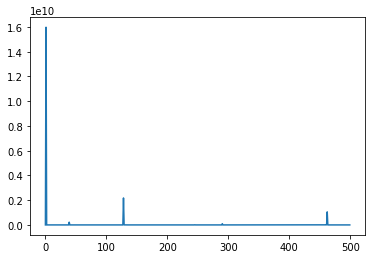

In [128]:
plt.plot(loss_arr[:500])

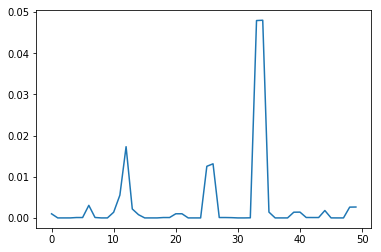

In [126]:
plt.plot(eta_values[:50])

In [114]:
epsilon = 0.0000000001


def stochastic_sgd_finite_differences(w, X, y, bs=64, eta = 0.00001):
    eta_values = []
    eta_values.append(eta)
    loss_arr = []
    for i in range(1000):
        for j in range(int(X.shape[0]/bs)):
            #print(j*bs)
            y_hat = X[j*(bs):(j+1)*bs].dot(w)
            cost = cost_function(y[j*(bs):(j+1)*bs], y_hat)
            loss_arr.append(cost)
            if (i%50 == 0): print("Cost:", cost)
            #print(y[j].shape, y_hat.shape, X[j].shape)
            gradient = -((y[j*(bs):(j+1)*bs] - y_hat).T.dot(X[j*(bs):(j+1)*bs]).reshape(-1,1))/y.shape[0]
            #print(gradient.shape)    
            old_w = w
            w = w - eta*gradient
            eta = eta - 2*epsilon*(cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta+epsilon)*gradient)) - cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta-epsilon)*gradient)) + epsilon)/(epsilon+cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta+2*epsilon)*gradient))+cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta-2*epsilon)*gradient))-2*cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-eta*gradient)))  
            eta = np.squeeze(eta)
            eta_values.append(eta)
            if (i%50 == 0):
                print("Learned LR:", eta)
    print('learned coefficients:', w)
    return w, eta_values, loss_arr

In [115]:
X, y, w = load_data_and_init_params()

w_new, eta_values, loss_arr = stochastic_sgd_finite_differences(w, X, y, 64, 0.0000001)

------ Loading Boston Houses Dataset ------
Cost: 8435.72567672
Learned LR: 3.42380656579e-05
Cost: 6419.91261979
Learned LR: 3.03334263191e-05
Cost: 219.393077413
Learned LR: 2.86617262381e-05
Cost: 719.194548475
Learned LR: 3.35450346776e-05
Cost: 548.888642558
Learned LR: 3.46235234532e-05
Cost: 2089.35761178
Learned LR: 2.06024116811e-05
Cost: 803.29308471
Learned LR: 1.54770909592e-05
Cost: 404.598998919
Learned LR: 3.42510394363e-05
Cost: 219.389131339
Learned LR: 3.09598143205e-05
Cost: 129.069079078
Learned LR: 2.90061828956e-05
Cost: 328.500004334
Learned LR: 4.09324949426e-05
Cost: 222.51609893
Learned LR: 3.5089205001e-05
Cost: 689.383781096
Learned LR: 2.06313626568e-05
Cost: 439.017279156
Learned LR: 1.54519634062e-05
Cost: 221.60263682
Learned LR: 3.40969200754e-05
Cost: 114.368696394
Learned LR: 3.09773369505e-05
Cost: 102.173003519
Learned LR: 3.1046149927e-05
Cost: 179.180581295
Learned LR: 3.7252036117e-05
Cost: 111.164576605
Learned LR: 3.51061822856e-05
Cost: 325.94

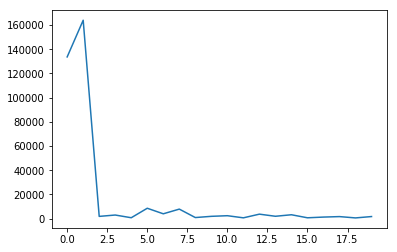

In [113]:
plt.plot(loss_arr[0:20])

In [118]:
true_w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(true_w)

[[  3.64911033e+01]
 [ -1.07170557e-01]
 [  4.63952195e-02]
 [  2.08602395e-02]
 [  2.68856140e+00]
 [ -1.77957587e+01]
 [  3.80475246e+00]
 [  7.51061703e-04]
 [ -1.47575880e+00]
 [  3.05655038e-01]
 [ -1.23293463e-02]
 [ -9.53463555e-01]
 [  9.39251272e-03]
 [ -5.25466633e-01]]
